## Get coordinates from lidar image

In [1]:
from image_manager import ImageManager
from rasterio.warp import reproject, Resampling
import rasterio
import numpy as np

In [2]:
BASE_PATH = './data/test/'
IMAGE_EXTENSION = '.tif'
IMAGE_NAME = 'test_image'

IMAGE_IMAGE = BASE_PATH + IMAGE_NAME + IMAGE_EXTENSION

LiDAR_image = ImageManager(IMAGE_IMAGE)
LiDAR_image.show()
LiDAR_image.transform_images = LiDAR_image.calculate_transform_coordinates('EPSG:4326')
LiDAR_image.show_image_coordinates()

Longitude: -74.193082  -------  Latitude: 40.609795
Longitude: -74.19379  -------  Latitude: 40.550919
Longitude: -74.129559  -------  Latitude: 40.550453
Longitude: -74.128795  -------  Latitude: 40.609328
Longitude: -74.193082  -------  Latitude: 40.609795


## Generate train data

In [1]:
from image_manager import ImageManager
import rasterio
from rasterio.plot import show
import numpy as np
import dataset_tools as tools
from tree_searchers import TreeSearcherJustLiDAR, TreeSearcherJustNir, TreeSearcherMix



[PROCESSING IMAGE: 1 ]

[IMAGE GENERATION STARTED.....]
[IMAGE GENERATION FINISHED]

[TREES DETECTION STARTED.....]
29008
[TREES DETECTION FINISHED]


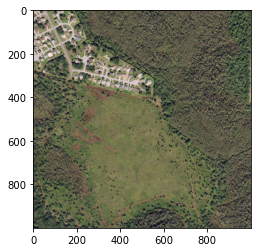

In [2]:
STEP_SIZE_OPTIONS = [2, 3, 5]
WINDOW_SIZE_OPTIONS = [5, 10, 15]
MIN_TREE_DISTANCE_OPTIONS = [5, 7, 10]

STEP_SIZE = 3
WINDOW_SIZE = 13
MIN_TREE_DISTANCE = 10

tools.generate_labels('./images/nir_images/','./images/LiDAR_data/', TreeSearcherMix(STEP_SIZE, WINDOW_SIZE, MIN_TREE_DISTANCE, 3))

In [3]:
tools.batch_image('1')

In [4]:
tools.batch_image('2')


In [5]:
tools.batch_image('3')


In [6]:
tools.batch_image('4')


RasterioIOError: data/train/image/4.tif: No such file or directory

## Generate test data

In [3]:
from image_manager import ImageManager
import dataset_tools as tools
import pandas as pd
from rasterio.warp import transform
import rasterio

In [4]:
image = ImageManager('./data/test/test_image.tif')
coords = tools.load_test_tree_point('data/test/Kolovai-Trees-20180108', image.crs)
tools.generate_test_labels(image, coords)

[GENERATING TEST DATA...]

-----
-----
-----
1111
2222
3333


29


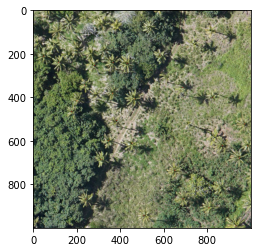

In [3]:
# tools.show_paint_image(test_image, tree_coords_list)